In [29]:
import paddle
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# 设置数据读取器，API自动读取MNIST数据训练集
train_dataset = paddle.vision.datasets.MNIST(mode='train')
data = np.array(train_dataset[0][0])
label = np.array(train_dataset[0][1])

In [31]:
def showImage(data,label,flag=0):
    if flag==0:
        plt.figure(figsize=(2,2))
        plt.imshow(data, cmap=plt.cm.binary)
        plt.axis('on') # 关掉坐标轴为 off
        plt.title(f'original image : {label[0]}') # 图像题目
        plt.show()
        return data,label
    if flag:
        plt.figure(figsize=(2,2))
        plt.imshow(data, cmap=plt.cm.binary)
        plt.axis('on') # 关掉坐标轴为 off
        plt.title(f'encrypted image : {label[0]}\n method : {label[1]}') # 图像题目
        plt.show() 

In [32]:
from Crypto.Cipher import AES  
from Crypto.Util.Padding import pad, unpad  
from Crypto.Random import get_random_bytes  
import numpy as np  
  
class ImageAESEncrypter:  
    def __init__(self, key):  
        # 如果key是字符串，则将其转换为字节序列；如果已经是字节序列，则保持不变  
        if isinstance(key, str):  
            self.key = key.encode('utf-8')  
        else:  
            self.key = key  
        self.cipher = AES.new(self.key, AES.MODE_CBC)  # 使用CBC模式，并生成一个随机的IV  
  
    def encrypt_image(self, image,label):  
        flattened_image = image.flatten().tolist()  # 将图像数据扁平化为一维列表  
        # 将图像数据转换为字节序列（注意：这里假设图像数据可以无损地转换为字节）  
        image_data = bytes(flattened_image)  
        # 对数据进行填充以满足AES块大小  
        padded_data = pad(image_data, AES.block_size)  

        encrypted_data = self.cipher.encrypt(padded_data)  
        transformed_label = np.append(label,'AES')

        return encrypted_data  ,transformed_label 

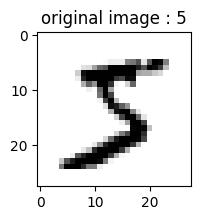

TypeError: Image data of dtype |S800 cannot be converted to float

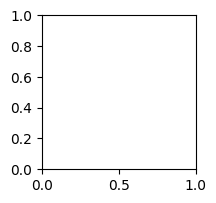

In [34]:
# 示例使用  
key = get_random_bytes(16)  
      
data,label = showImage(data,label)
      
# 创建加密器实例  
encrypter = ImageAESEncrypter(key)

# 加密图像  
encrypted_data,transformed_label = encrypter.encrypt_image(data,label)  
      
showImage(encrypted_data,transformed_label,flag=1)

In [35]:
# coding: utf-8
from Crypto.Cipher import AES
import base64

class Aes(object):

    def __init__(self, securityKey, iv):
        self.securityKey = securityKey
        self.iv = iv
	'''
	加密
	@param string $plainText 明文
	'''
    def encrypt(self, plainText):
        plainText = self.addPKCS7Padding(plainText)
        cipher = AES.new(self.securityKey, AES.MODE_CBC, self.iv)
        encrypted = cipher.encrypt(plainText)
        return base64.b64encode(encrypted)
	'''
	解密
	@param string $cipherText 密文
	'''
    def decrypt(self, cipherText):
        cipherText = base64.b64decode(cipherText)
        cipher = AES.new(self.securityKey, AES.MODE_CBC, self.iv)
        decrypted = cipher.decrypt(cipherText)
        decrypted = self.stripPKSC7Padding(decrypted)
        return decrypted
	'''
     填充算法
     @param string $source
     @return string
	'''
    def addPKCS7Padding(self, source):
        block = AES.block_size
        padding = block - len(source) % block
        padding_text = chr(padding) * padding
        return source + padding_text
    '''
     移去填充算法
     @param string $source
     @return string
    '''
    def stripPKSC7Padding(self, source):
        lengt = len(source)
        unpadding = ord(source[lengt - 1])
        return source[0:lengt-unpadding]

if __name__ == '__main__':
	
	securityKey16 = 'Skesj(eE%32sLOap'
	securityKey24 = 'Skesj(eE%32sLOapA9e2snEw'
	securityKey32 = 'Skesj(eE%32sLOapA9e2snEwEeopsWui'
	iv = "1234567890123456"
	aes = Aes(securityKey16, iv)
	plainText = "我是python内容";
	cipherText = aes.encrypt(plainText)
	print('Python程序')
	print('加密前的明文：'+plainText)
	print('加密后的密文：'+ cipherText)
	outPlainText = aes.decrypt(cipherText)
	print('解密后明文：'+ outPlainText)

TabError: inconsistent use of tabs and spaces in indentation (3457281881.py, line 10)